In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
#from lr_utils import load_dataset

%matplotlib inline

In [2]:
  
def load_dataset():
    train_dataset = h5py.File('train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes


In [3]:
# Loading the data (cat/non-cat)
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

In [12]:
type(train_set_x_orig)

train_set_x_orig.shape

(209, 64, 64, 3)

y = [0], it's a 'non-cat' picture.


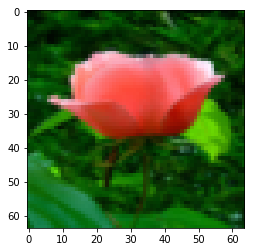

In [78]:
# Example of a picture
index = 3
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", it's a '" + classes[np.squeeze(train_set_y[:,index])].decode("utf-8") +  "' picture.")

In [25]:
a  = h5py.File('train_catvnoncat.h5', "r")
a["train_set_x"]

<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">

(3,)
[97 66 65]


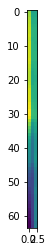

In [183]:
print(train_set_x_orig[0][20][25].shape)
print(train_set_x_orig[0][20][30])
plt.imshow(train_set_x_orig[0][20])

In [134]:
print(np.squeeze(train_set_y[:,2]))

1


In [76]:
classes[np.squeeze(train_set_y[:,index])].decode("utf-8")

'non-cat'

In [144]:
type(classes[0])

numpy.bytes_

Exercise: Find the values for:

- m_train (number of training examples)
- m_test (number of test examples)
- num_px (= height = width of a training image)

Remember that train_set_x_orig is a numpy-array of shape (m_train, num_px, num_px, 3). For instance, you can access m_train by writing train_set_x_orig.shape[0]

In [145]:
### START CODE HERE ### (≈ 3 lines of code)
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]

### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


For convenience, you should now reshape images of shape (num_px, num_px, 3) in a numpy-array of shape (num_px $*$ num_px $*$ 3, 1). After this, our training (and test) dataset is a numpy-array where each column represents a flattened image. There should be m_train (respectively m_test) columns.

Exercise: Reshape the training and test data sets so that images of size (num_px, num_px, 3) are flattened into single vectors of shape (num_px $*$ num_px $*$ 3, 1).

A trick when you want to flatten a matrix X of shape (a,b,c,d) to a matrix X_flatten of shape (b$*$c$*$d, a) is to use:

X_flatten = X.reshape(X.shape[0], -1).T      # X.T is the transpose of X

In [184]:
# Reshape the training and test examples

### START CODE HERE ### (≈ 2 lines of code)

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0],-1).T

### END CODE HERE ###

print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [159]:
train_set_x_orig.shape
print (train_set_x_orig.shape)
x = train_set_x_orig.reshape(train_set_x_orig.shape[1] * train_set_x_orig.shape[2] * train_set_x_orig.shape[3],train_set_x_orig.shape[0]).T
print(str(x[0:5,0]))
print (x.shape)

(209, 64, 64, 3)
[17 31 56 22 33]
(209, 12288)


In [170]:
k = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1)
print(k.shape)
p = train_set_x_orig.reshape(train_set_x_orig.shape[0],-1).T
print(p.shape)
l = train_set_x_orig.reshape(-1,train_set_x_orig.shape[0])
print (l.shape)
print(str(k[0:5,0]))
print(str(p[0:5,0]))
print(str(l[0:5,0]))

(209, 12288)
(12288, 209)
(12288, 209)
[ 17 196  82   1   9]
[17 31 56 22 33]
[17 71 49 38 70]


In [182]:
print (train_set_x_flatten.shape)
print (train_set_x_flatten[0])
print (train_set_x_flatten[0].shape)

(12288, 209)
[ 17 196  82   1   9  84  56  19  63  23 188   4 154  17  72 245 253 217
 140   2   5  17 164 156 122  15  78  36  14 180  39 190 233 129 137  26
  23  94  63 113 119   1  63 255  61   0  64  51  21  57 164 152 106  40
  15 255  31 141  52  75  81 125  99  94   2  86 226  76 139  43  24   7
  13 103  85 110  25  61  34  27 176 187  26 252  96  25  34  60 123  45
  99  49  26 154 141  62 152 194 113  57 172  70  22 142  37 127 172 122
 110  75 165 174   5 166 144 196   2  64 190 170  86 106 198  70 171   9
  50  84 161  23  79 228 104   1   5 255 142 196 135  89   0 188 255  17
  31 169 136  79 130 150 251   7  45 159  10 135  32  30 140  29  29 110
  99 242 158  30 240  84  10  93 200 190 133  74  25   3 106 133  12 105
 239   1  62  67  29 178  68  55 201 195 144 251 130  67  10   0  93 101
 151  29 255  43 102  93 200   9 143  22   8]
(209,)


In [186]:
#standardizing the dataset to form the normalized dataset. As it is image data we can divide each row by 255

train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255

In [216]:
print (train_set_x.shape)
print (test_set_x.shape)

(12288, 209)
(12288, 50)


4 - Building the parts of our algorithm

The main steps for building a Neural Network are:

Define the model structure (such as number of input features)
Initialize the model's parameters
Loop:

-Calculate current loss (forward propagation)

-Calculate current gradient (backward propagation)

-Update parameters (gradient descent)

You often build 1-3 separately and integrate them into one function we call model().

4.1 - Helper functions

Exercise: Using your code from "Python Basics", implement sigmoid(). As you've seen in the figure above, you need to compute $sigmoid( w^T x + b)$ to make predictions.

In [187]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    """
    Compute the sigmoid of z

    Arguments:
    x -- A scalar or numpy array of any size.

    Return:
    s -- sigmoid(z)
    """

    ### START CODE HERE ### (≈ 1 line of code)
    s = 1 /(1 + np.exp(-z))
    ### END CODE HERE ###
    
    return s

In [189]:
#sanity check
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(9.2) = " + str(sigmoid(9.2)))

sigmoid(0) = 0.5
sigmoid(9.2) = 0.999898970806


4.2 - Initializing parameters

Exercise: Implement parameter initialization in the cell below. You have to initialize w as a vector of zeros. If you don't know what numpy function to use, look up np.zeros() in the Numpy library's documentation.

In [197]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):
    """
    This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0.
    
    Argument:
    dim -- size of the w vector we want (or number of parameters in this case)
    
    Returns:
    w -- initialized vector of shape (dim, 1)
    b -- initialized scalar (corresponds to the bias)
    """
    
    ### START CODE HERE ### (≈ 1 line of code)
    w = np.zeros(shape = (dim,1))
    b = 0
    ### END CODE HERE ###

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [198]:
#sanity check
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[ 0.]
 [ 0.]]
b = 0


For image inputs, w will be of shape (num_px $\times$ num_px $\times$ 3, 1).

4.3 - Forward and Backward propagation

Now that your parameters are initialized, you can do the "forward" and "backward" propagation steps for learning the parameters.

Exercise: Implement a function propagate() that computes the cost function and its gradient.

Hints:

Forward Propagation::

-You get X

-You compute $A = \sigma(w^T X + b) = (a^{(0)}, a^{(1)}, ..., a^{(m-1)}, a^{(m)})$

-You calculate the cost function: $J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$

-Here are the two formulas you will be using:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T\tag{7}$$$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})\tag{8}$$

In [203]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation
    """
    
    m = X.shape[1]
    
    # FORWARD PROPAGATION (FROM X TO COST)
    ### START CODE HERE ### (≈ 2 lines of code)
    
    A = sigmoid(np.dot(w.T,X) + b)
    cost = (-1/m)* np.sum(Y * np.log(A) + (1 - Y)* np.log(1 -A))
    
    ### END CODE HERE ###
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    ### START CODE HERE ### (≈ 2 lines of code)
    
    dw = (1 / m) * np.dot( X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)
    
    ### END CODE HERE ###

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [204]:
w, b, X, Y = np.array([[1], [2]]), 2, np.array([[1,2], [3,4]]), np.array([[1, 0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[ 0.99993216]
 [ 1.99980262]]
db = 0.499935230625
cost = 6.00006477319


d) Optimization

-You have initialized your parameters.

-You are also able to compute a cost function and its gradient.

-Now, you want to update the parameters using gradient descent.

Exercise: Write down the optimization function. The goal is to learn $w$ and $b$ by minimizing the cost function $J$. For a parameter $\theta$, the update rule is $ \theta = \theta - \alpha \text{ } d\theta$, where $\alpha$ is the learning rate.

In [205]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        
        grads,cost = propagate(w, b, X, Y)
        
        ### END CODE HERE ###
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        
        w = w - learning_rate * (dw)
        b = b - learning_rate * (db)
        
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [206]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[ 0.1124579 ]
 [ 0.23106775]]
b = 1.55930492484
dw = [[ 0.90158428]
 [ 1.76250842]]
db = 0.430462071679


Exercise: The previous function will output the learned w and b. We are able to use w and b to predict the labels for a dataset X. Implement the predict() function. There is two steps to computing predictions:

1.Calculate $\hat{Y} = A = \sigma(w^T X + b)$

2.Convert the entries of a into 0 (if activation <= 0.5) or 1 (if activation > 0.5), stores the predictions in a vector Y_prediction. If you wish, you can use an if/else statement in a for loop (though there is also a way to vectorize this).

In [211]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    ### START CODE HERE ### (≈ 1 line of code)
    A = sigmoid(np.dot(w.T,X) + b)
    ### END CODE HERE ###
    
    for i in range(A.shape[1]):
        # Convert probabilities a[0,i] to actual predictions p[0,i]
        ### START CODE HERE ### (≈ 4 lines of code)
        Y_prediction[0,i] = 1 if A[0,i] > 0.5 else 0
        ### END CODE HERE ###
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [212]:
print("predictions = " + str(predict(w, b, X)))

predictions = [[ 1.  1.]]


1.Initialize (w,b)

2.Optimize the loss iteratively to learn parameters (w,b):

    a.computing the cost and its gradient
    b.updating the parameters using gradient descent
    
3.Use the learned (w,b) to predict the labels for a given set of examples

5 - Merge all functions into a model

You will now see how the overall model is structured by putting together all the building blocks (functions implemented in the previous parts) together, in the right order.

Exercise: Implement the model function. Use the following notation:

- Y_prediction for your predictions on the test set
- Y_prediction_train for your predictions on the train set
- w, costs, grads for the outputs of optimize()

In [248]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train -- training set represented by a numpy array of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test -- test set represented by a numpy array of shape (num_px * num_px * 3, m_test)
    Y_test -- test labels represented by a numpy array (vector) of shape (1, m_test)
    num_iterations -- hyperparameter representing the number of iterations to optimize the parameters
    learning_rate -- hyperparameter representing the learning rate used in the update rule of optimize()
    print_cost -- Set to true to print the cost every 100 iterations
    
    Returns:
    d -- dictionary containing information about the model.
    """
    
    ### START CODE HERE ###
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grades, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_train = predict(w,b,X_train)
    Y_prediction_test = predict(w,b,X_test)

    ### END CODE HERE ###

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [249]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


y = 0, you predicted that it is a "cat" picture.


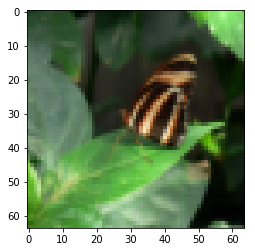

In [246]:
# Example of a picture that was wrongly classified.
index = 5
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
print ("y = " + str(test_set_y[0, index]) + ", you predicted that it is a \"" + classes[int(d['Y_prediction_test'][0, index])].decode("utf-8") +  "\" picture.")
# classes[np.squeeze(train_set_y[:,index])].decode("utf-8")

In [247]:
d['Y_prediction_test']

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
         1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,
         1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.]])

In [245]:
classes[1]

b'cat'

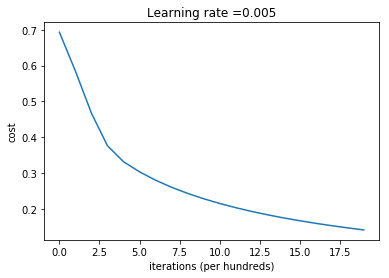

In [250]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()